<a href="https://colab.research.google.com/github/racso339/Challenge_TelecomX_Part_2_Alura/blob/master/Challenge_TelecomX_Pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subir archivo de datos e importar bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
telecom_datos = pd.read_csv('/content/drive/MyDrive/dsllo psnal/Alura - ORACLE/CHALLENGES/03 Telecom X part 2/telecom_df_final.csv')

In [4]:
telecom_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   Contract          7267 non-null   object 
 3   PaperlessBilling  7267 non-null   bool   
 4   PaymentMethod     7267 non-null   object 
 5   Charges.Monthly   7267 non-null   float64
 6   Charges.Total     7267 non-null   float64
 7   Cuentas_Diarias   7267 non-null   float64
dtypes: bool(2), float64(3), object(3)
memory usage: 355.0+ KB


# Eliminación de Columnas Irrelevantes

In [5]:
telecom_datos = telecom_datos.drop(columns = 'customerID')

In [6]:
telecom_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   bool   
 1   Contract          7267 non-null   object 
 2   PaperlessBilling  7267 non-null   bool   
 3   PaymentMethod     7267 non-null   object 
 4   Charges.Monthly   7267 non-null   float64
 5   Charges.Total     7267 non-null   float64
 6   Cuentas_Diarias   7267 non-null   float64
dtypes: bool(2), float64(3), object(2)
memory usage: 298.2+ KB


# Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
# Defino la variable objetivo "y" (la que quiero predecir)
# La matriz de caracteristicas "X" (las variables predictoras)

y = telecom_datos['Churn']
X = telecom_datos.drop('Churn', axis = 1)

In [9]:
# Momento de usar LabelEncoder para pasar de texto a numero

le = LabelEncoder()
X['Contract'] = le.fit_transform(X['Contract'])
X['PaperlessBilling'] = le.fit_transform(X['PaperlessBilling'])
X['PaymentMethod'] = le.fit_transform(X['PaymentMethod'])

In [10]:
# Usando MinMaxScaler para que las variables numericas queden entre 0 y 1
# Asegura esto que tenga la misma influencia la información

scaler = MinMaxScaler()
numerical_columns = ['Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [11]:
# Ahora se divide los datos en conjuntos de entrenamiento(80%) y prueba(20%)
# Para que el modelo aprenda con una parte y luego con datos que no ha visto

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
# Se corrobara las dimensiones de lo que se hizo anteriormente

print("--------------")
print("Dimension de los conjuntos de datos luego de la división: ")
print()
print(f'Conjunto de entrenamiento(X_train): {X_train.shape}')
print(f'Conjunto de prueba(X_test): {X_test.shape}')
print(f'Variable objetivo de entrenamiento(y_train): {y_train.shape}')
print(f'Variable objetivo de prueba(y_test): {y_test.shape}')
print("--------------")

--------------
Dimension de los conjuntos de datos luego de la división: 

Conjunto de entrenamiento(X_train): (5813, 6)
Conjunto de prueba(X_test): (1454, 6)
Variable objetivo de entrenamiento(y_train): (5813,)
Variable objetivo de prueba(y_test): (1454,)
--------------


# Verificación de la Proporción de Cancelación (Churn)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
# Se empieza a crear una instancia del modelo para que se fije en los clientes
# Los mas parecidos para tomar una decisión

knn = KNeighborsClassifier(n_neighbors = 3)

In [15]:
# Usando .fit() es el paso del "entrenamiento" para que aprenda del conjunto de datos
# A partir de X_train e y_train

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
# Hora de hacer las predicciones para su "examen" usando .predict()
# Para corrobar lo que no vio en X_test

predicciones = knn.predict(X_test)

In [17]:
# En el momento de calcular su presición con "accuracy"
# Para saber cual fue el porcentaje de exactitud

precision = accuracy_score(y_test, predicciones)

In [18]:
# Calculando la matriz de confusión dara un resumen
# Detallado de los aciertos y fallos

matriz = confusion_matrix(y_test, predicciones)

In [19]:
# Imprimiendo los resultados

print("--------------")
print(f'Presicion del modelo: {precision:.2f}')
print("--------------")
print('Matriz de confusión: ')
print(matriz)
print("--------------")

--------------
Presicion del modelo: 0.77
--------------
Matriz de confusión: 
[[936 146]
 [195 177]]
--------------


# Balanceo de Clases

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
# Creando la instancia del modelo lineal que no tiene hiperparametro 'k'

lr = LogisticRegression(random_state = 42, max_iter = 1000)

In [22]:
# Entrenamos el modelo con los datos de entrenamiento

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [23]:
# Predicciones de los datos de prueba

predicciones_lr = lr.predict(X_test)

In [24]:
# Calculamos la precision del modelo

precision_lr = accuracy_score(y_test, predicciones_lr)

In [25]:
# Calculamos la matriz de confusión del modelo

matriz_lr = confusion_matrix(y_test, predicciones_lr)

In [26]:
# Imprimiendo los resultados

print("--------------")
print(f'Presicion del modelo de Regresión Logistica: {precision_lr:.2f}')
print("--------------")
print('Matriz de confusión del modelo de Regresión Logistica: ')
print(matriz_lr)
print("--------------")

--------------
Presicion del modelo de Regresión Logistica: 0.80
--------------
Matriz de confusión del modelo de Regresión Logistica: 
[[989  93]
 [200 172]]
--------------


# Normalización o Estandarización

## Regresión Logística

   Es la mejor opción por su leve mejoría del 3% con 80% en total en comparación con **KNeighbors** que fue de un 77% de certeza.

### A destacar:
   . Tuvo mayor ventaja a la hora de reducir los **FALSOS NEGATIVOS** ayudando a la empresa que actuén para que no renuncien el servicio

   . Reduce las falsas alarmas para que el equipo de marketing puedan actuar con los clientes en riesgo de irse

   . Es menor el peligro de errores en las areas mas criticas


# Análisis de Correlación

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [28]:
# Creando una instancia del modelo haciendo uso de
# 'random_state' para que los resultados sean reproducibles

arbol_decision = DecisionTreeClassifier(random_state = 42)

In [29]:
# Hora de entrenar el arbol con los datos de entrenamiento

arbol_decision.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
# Crear una variable para que nos de la importancia de cada columna
# Usando 'feature_importances_' obteniendo un array

importancia_columnas = arbol_decision.feature_importances_

In [31]:
# Creo una función para una mejor visualización

df_importancia = pd.DataFrame({
    'Caracteristica': X.columns,
    'Importancia': importancia_columnas
})

In [32]:
# Ordeno el dataframe de forma descendente

df_importancia = df_importancia.sort_values(by = 'Importancia', ascending = False)

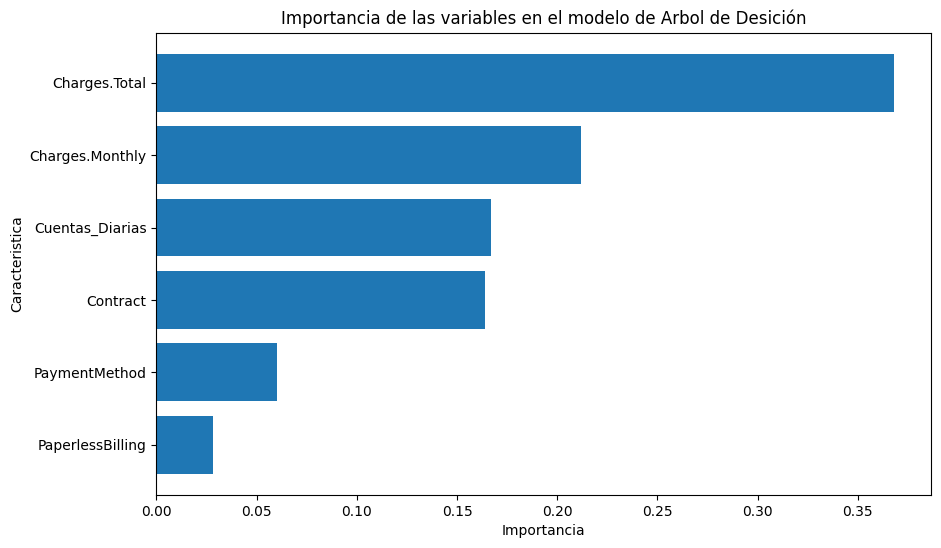

In [33]:
# Hora de visualizar los datos
# Creando un grafico de barras para ver la importancia de cada columna

plt.figure(figsize = (10, 6))
plt.title('Importancia de las variables en el modelo de Arbol de Desición')
plt.barh(df_importancia['Caracteristica'], df_importancia['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Caracteristica')
plt.gca().invert_yaxis()
plt.show()

In [34]:
# Imprimiendo los resultados

print("--------------")
print('Importancia de las variables en el modelo de Arbol de Desición: ')
print()
print(df_importancia)
print("--------------")

--------------
Importancia de las variables en el modelo de Arbol de Desición: 

     Caracteristica  Importancia
4     Charges.Total     0.368282
3   Charges.Monthly     0.211965
5   Cuentas_Diarias     0.167165
0          Contract     0.163832
2     PaymentMethod     0.060336
1  PaperlessBilling     0.028419
--------------


# Análisis Dirigido

In [35]:
import seaborn as sns

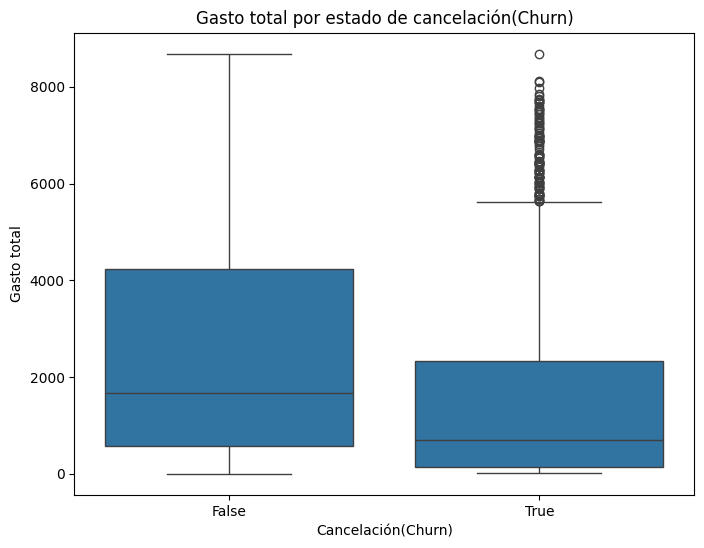

In [36]:
# Relación entre "Gasto total"(Charges.Total) y "Cancelación"(Churn)

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Churn', y = 'Charges.Total', data = telecom_datos)
plt.title("Gasto total por estado de cancelación(Churn)")
plt.xlabel("Cancelación(Churn)")
plt.ylabel("Gasto total")
plt.show()

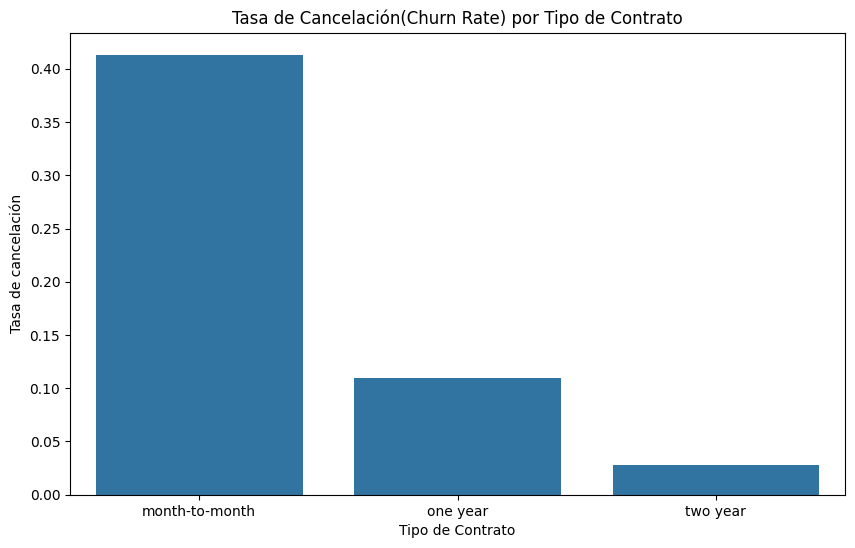

In [37]:
# Relación entre "Tiempo de contrato"(Contract) y "Cancelación"(Churn)

churn_por_contrato = telecom_datos.groupby('Contract')['Churn'].mean().reset_index()

plt.figure(figsize = (10, 6))
sns.barplot(x = 'Contract', y = 'Churn', data = churn_por_contrato)
plt.title("Tasa de Cancelación(Churn Rate) por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Tasa de cancelación")
plt.show()

# Separación de Datos

In [38]:
import pickle

In [39]:
# Guardando el modelo

modelo_lr = 'modelo_lr.pkl'

In [40]:
# Uso la función "open" para crear el archivo llamado "modelo_lr.pkl"
# En modo de escritura binaria(wb)

with open(modelo_lr, 'wb') as archivo_salida:
  pickle.dump(lr, archivo_salida) # Así guardo el objeto "lr" en el archivo

In [41]:
# Para corrobar que guardo el modelo y se pueda cargar
# Se que es opcional pero me aseguro que lo hice bien

with open(modelo_lr, 'rb') as archivo_entrada:
  modelo_cargado = pickle.load(archivo_entrada)

In [42]:
# Ahora se verifica si funciona

prediccion_cargada = modelo_cargado.predict(X_test)

In [43]:
# Imprimiendo los resultados

print("--------------")
print(f'El modelo de Regresión Logística ha sido guardado en {modelo_lr}.')
print("Se cargó y se verificó que puede hacer predicciones correctamente.")
print("--------------")

--------------
El modelo de Regresión Logística ha sido guardado en modelo_lr.pkl.
Se cargó y se verificó que puede hacer predicciones correctamente.
--------------


El pickle se usó para serializar y guardar el modelo entrenado(Que es de Regresion Logistica) en un archivo llamado modelo_lr.pkl. Esto me permite reutilizar el modelo en cualquier momento porque la separación del conjunto de datos con su porcentaje de entrenamiento(80%) y prueba(20%) se hizo al comienzo del proyecto; para hacer predicciones en datos nuevos sin la necesidad de volver a entrenarlo, lo cual es un paso fundamental para llevar un modelo a producción.

# Creación de Modelos

In [44]:
# Ahora se creara los modelos sin normalización

X_train_no_norm, X_test_no_norm, y_train_no_norm, y_test_no_norm = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
# Entrenar Regresión Logistica(Sin Normalizar)

lr_no_normalizado = LogisticRegression(random_state = 42, max_iter = 1000)
lr_no_normalizado.fit(X_train_no_norm, y_train_no_norm)

predicciones_lr_no_norm = lr_no_normalizado.predict(X_test_no_norm)
precision_lr_no_norm = accuracy_score(y_test_no_norm, predicciones_lr_no_norm)
matriz_lr_no_norm = confusion_matrix(y_test_no_norm, predicciones_lr_no_norm)

In [46]:
# Entrenar Arbol de Decisión(Sin Normalizar)

dt_no_normalizado = DecisionTreeClassifier(random_state = 42)
dt_no_normalizado.fit(X_train_no_norm, y_train_no_norm)

predicciones_dt_no_norm = dt_no_normalizado.predict(X_test_no_norm)
precision_dt_no_norm = accuracy_score(y_test_no_norm, predicciones_dt_no_norm)
matriz_dt_no_norm = confusion_matrix(y_test_no_norm, predicciones_dt_no_norm)

In [47]:
# Imprimiendo los resultados sin normalizar

# IMPORTANTE: Asegúrate de reiniciar el entorno de ejecución de Colab
# Antes de correr este código. Esto garantiza que el DataFrame se
# Cree desde cero y los modelos se entrenen correctamente sin normalización
# Desde el inicio hasta la sección "Encoding" ejecutando las 3 primeras lineas de codigo

print("--------------")
print("Resultados del modelo de Regresión Logística SIN NORMALIZAR:")
print(f"Precisión: {precision_lr_no_norm:.2f}")
print("Matriz de Confusión:")
print(matriz_lr_no_norm)
print("--------------")
print("Resultados del modelo de Árbol de Decisión SIN NORMALIZAR:")
print(f"Precisión: {precision_dt_no_norm:.2f}")
print("Matriz de Confusión:")
print(matriz_dt_no_norm)

--------------
Resultados del modelo de Regresión Logística SIN NORMALIZAR:
Precisión: 0.80
Matriz de Confusión:
[[989  93]
 [200 172]]
--------------
Resultados del modelo de Árbol de Decisión SIN NORMALIZAR:
Precisión: 0.72
Matriz de Confusión:
[[878 204]
 [199 173]]


## Justificación de por qué...

En este caso en particular aun con los datos en crudo(Sin Normalizar) sigue dominando con un porcentaje importante del 80% el modelo de Regresión Logística mostrando solo una ligera confusión en la Matriz de Confusión.

Pese a que el Árbol de Decisión esta preparado para este tipo de caso mostro solo un resultado del 72% pero demuestra que esta preparado para los umbrales de datos.

He concluido que normalizar la información es una buena practica aunque no importante para todos los modelos y si para otros por eso los resultado demuestra tal evidencia con que modelo seguir para este proyecto.

# Evaluación de los Modelos

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

In [49]:
# Evaluando la Regresión Logística

print("--------------")
print("Las métricas del modelo de Regresión Logística:")
print(f"Exactitud (Accuracy): {accuracy_score(y_test, predicciones_lr):.2f}")
print(f"Precisión (Precision): {precision_score(y_test, predicciones_lr):.2f}")
print(f"Recall: {recall_score(y_test, predicciones_lr):.2f}")
print(f"F1-score: {f1_score(y_test, predicciones_lr):.2f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, predicciones_lr))
print("--------------")

--------------
Las métricas del modelo de Regresión Logística:
Exactitud (Accuracy): 0.80
Precisión (Precision): 0.65
Recall: 0.46
F1-score: 0.54
Matriz de Confusión:
[[989  93]
 [200 172]]
--------------


In [50]:
# Evaluando la Arbol de Decisión

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
predicciones_dt = dt.predict(X_test)

# Imprimiendo los resultados

print("--------------")
print("Métricas del modelo de Arbol de Decisión:")
print(f"Exactitud (Accuracy): {accuracy_score(y_test, predicciones_dt):.2f}")
print(f"Precisión (Precision): {precision_score(y_test, predicciones_dt):.2f}")
print(f"Recall: {recall_score(y_test, predicciones_dt):.2f}")
print(f"F1-score: {f1_score(y_test, predicciones_dt):.2f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, predicciones_dt))
print("--------------")

--------------
Métricas del modelo de Arbol de Decisión:
Exactitud (Accuracy): 0.72
Precisión (Precision): 0.46
Recall: 0.47
F1-score: 0.46
Matriz de Confusión:
[[878 204]
 [199 173]]
--------------


In [51]:
# Regresión Logistica (Datos de entrenamiento)

predicciones_lr_train = lr.predict(X_train)
exactitud_lr_train = accuracy_score(y_train, predicciones_lr_train)

# Regresión Logistica (Datos de prueba)

predicciones_lr_test = lr.predict(X_test)
exactitud_lr_test = accuracy_score(y_test, predicciones_lr_test)

In [52]:
# Arbol de Decisión (Datos de entrenamiento)

predicciones_dt_train = dt.predict(X_train)
exactitud_dt_train = accuracy_score(y_train, predicciones_dt_train)

# Arbol de Decisión (Datos de prueba)

predicciones_dt_test = dt.predict(X_test)
exactitud_dt_test = accuracy_score(y_test, predicciones_dt_test)

In [53]:
# La evaluación de Regresión Logistica y Arbol de Decisión

print("--------------")
print("Evaluación del modelo de Regresión Logística:")
print(f"Exactitud en Entrenamiento: {exactitud_lr_train:.2f}")
print(f"Exactitud en Prueba: {exactitud_lr_test:.2f}")
print("--------------")
print("Evaluación del modelo de Árbol de Decisión:")
print(f"Exactitud en Entrenamiento: {exactitud_dt_train:.2f}")
print(f"Exactitud en Prueba: {exactitud_dt_test:.2f}")
print("--------------")

--------------
Evaluación del modelo de Regresión Logística:
Exactitud en Entrenamiento: 0.79
Exactitud en Prueba: 0.80
--------------
Evaluación del modelo de Árbol de Decisión:
Exactitud en Entrenamiento: 0.99
Exactitud en Prueba: 0.72
--------------


## Justificación sobre Overfitting y Underfitting

Regresión Logística (Modelo Equilibrado):

Exactitud en Entrenamiento: 0.79

Exactitud en Prueba: 0.80

Al comparar los resultados, vemos que la exactitud en el entrenamiento y en la prueba es muy similar. Esto indica que el modelo de Regresión Logística no presenta overfitting ni underfitting. Ha aprendido bien los patrones de los datos de entrenamiento y tiene una excelente capacidad para generalizar y hacer predicciones precisas en datos nuevos que no ha visto.

----------

Árbol de Decisión (Modelo con Overfitting):

Exactitud en Entrenamiento: 0.99

Exactitud en Prueba: 0.72

En este caso, la diferencia entre el rendimiento en entrenamiento y en prueba es enorme. El modelo de Árbol de Decisión obtuvo un 99% de exactitud en los datos de entrenamiento, lo que significa que prácticamente los memorizó. Sin embargo, al enfrentarse a datos nuevos (el set de prueba), su rendimiento cayó drásticamente a un 72%. Esto es un ejemplo claro de overfitting (sobreajuste), donde el modelo es demasiado complejo y pierde su capacidad para generalizar.

# Análisis de la Importancia de las Variables

In [54]:
# Analizar coeficientes del modelo de Regresión Logística

print("--------------")
print("Análisis de la importancia de las variables (Regresión Logística):")
print("Coeficientes del modelo (mayor magnitud = mayor importancia):")
coeficientes_lr = pd.DataFrame(lr.coef_[0], index=X.columns,
                                columns=['Coeficiente']).sort_values(by='Coeficiente', ascending=False)
print(coeficientes_lr)
print("--------------")

--------------
Análisis de la importancia de las variables (Regresión Logística):
Coeficientes del modelo (mayor magnitud = mayor importancia):
                  Coeficiente
Charges.Monthly      1.451222
Cuentas_Diarias      1.451222
PaperlessBilling     0.448694
PaymentMethod        0.123968
Contract            -1.133709
Charges.Total       -2.719452
--------------


In [55]:
# Analizar importancia de las variables del Árbol de Decisión

print("--------------")
print("Análisis de la importancia de las variables (Árbol de Decisión):")
print("Importancia relativa de cada variable (mayor valor = mayor importancia):")
importancia_dt = pd.DataFrame(dt.feature_importances_,
                              index=X.columns,
                              columns=['Importancia']).sort_values(by='Importancia', ascending=False)
print(importancia_dt)
print("--------------")

--------------
Análisis de la importancia de las variables (Árbol de Decisión):
Importancia relativa de cada variable (mayor valor = mayor importancia):
                  Importancia
Charges.Total        0.368282
Charges.Monthly      0.211965
Cuentas_Diarias      0.167165
Contract             0.163832
PaymentMethod        0.060336
PaperlessBilling     0.028419
--------------


# Conclusión

### Regresión Logística (Interpretación de Coeficientes)

El modelo de **Regresión Logística** permite identificar la relevancia de cada variable a través de sus coeficientes.  
- La **magnitud** refleja la fuerza de la influencia.  
- El **signo** indica si la relación es positiva o negativa.

**Factores con mayor efecto positivo:**  
- **Charges.Monthly** y **Cuentas_Diarias** presentan los coeficientes más altos en sentido positivo.  
Esto implica que un incremento en el gasto mensual o en el número de cuentas diarias se asocia con una mayor probabilidad de cancelación.

**Factores con mayor efecto negativo:**  
- **Charges.Total** y **Contract** muestran los coeficientes más bajos (en negativo).  
Esto sugiere que los clientes con un gasto total más elevado y aquellos con contratos de mayor duración (por ejemplo, a dos años) tienden a ser menos propensos a cancelar.

---

### Árbol de Decisión (Importancia de Variables)

El modelo de **Árbol de Decisión** evalúa la relevancia de cada variable midiendo cuánto contribuye a dividir correctamente a los clientes que cancelan de los que permanecen.

**Variables con mayor relevancia:**  
- La más influyente es **Charges.Total**, seguida por **Charges.Monthly** y **Cuentas_Diarias**.  
Esto confirma que los patrones de gasto son los elementos clave para anticipar la cancelación.

**Variables con menor relevancia:**  
- **PaperlessBilling** y **PaymentMethod** apenas aportan información significativa, por lo que no son determinantes en este modelo.

---

### Síntesis Final

Ambos enfoques coinciden en que las variables vinculadas al gasto del cliente (**Charges.Total**, **Charges.Monthly** y **Cuentas_Diarias**) resultan ser los predictores más sólidos de la cancelación.  
Este hallazgo es fundamental para la estrategia del negocio, pues orienta los esfuerzos de retención hacia los perfiles de clientes con esos patrones de consumo.


## Estrategias Propuestas para Retener Clientes

A partir del análisis detallado de los datos y del desempeño de los modelos de Machine Learning, se concluye que los factores más determinantes en la cancelación son el **gasto mensual (Charges.Monthly)** y el **tipo de contrato (Contract)**. Con base en esto, se plantean las siguientes acciones:

---

### 💡 Añadir Valor al Servicio

La Regresión Logística evidenció que un gasto mensual elevado incrementa el riesgo de cancelación.  
Para enfrentar este desafío, se sugiere **mantener la tarifa mensual** pero justificarla con beneficios adicionales, tales como:  
- Acceso a plataformas de entretenimiento,  
- Datos móviles extra,  
- Ventajas exclusivas para clientes fieles.  

De esta forma, el “alto costo” se transforma en un **paquete integral y atractivo**, disminuyendo la percepción negativa del precio.

---

### 💡 Promover Contratos de Mayor Duración

Los clientes con contratos largos (por ejemplo, de dos años) presentan una menor probabilidad de cancelar.  
Se recomienda diseñar **descuentos especiales** y **ofertas exclusivas** dirigidas a quienes poseen contratos mensuales, con el objetivo de motivarlos a migrar a planes de uno o dos años.  
Esto no solo incrementa la permanencia, sino que también fortalece la lealtad a la marca.

---

### 💡 Segmentación Inteligente y Ofertas Personalizadas

El modelo de Regresión Logística, por su balance, es una herramienta eficaz para detectar clientes con alto riesgo de abandonar el servicio.  
Se debe utilizar para:  
- Identificar perfiles vulnerables (ejemplo: contratos mensuales con alto gasto mensual).  
- Diseñar y enviar **promociones personalizadas** de manera proactiva.  

Con este enfoque, se actúa antes de la cancelación, aumentando la efectividad de las acciones de retención.

---
